# **RDBMS:**

There are various RDBMS's:
- **MySQL** (or MariaDB) is arguably the most popular [MariaDB is a community-developed, commercially supported fork of the MySQL]
- **PostgreSQL** is arguably the best
- **SQL Server** is good, but not free
- There's more, but these are the main ones

# **<font color='deepskyblue'>PostgreSQL - Python (psycopg2):</font>**

<br>
<img src="imgs/psycopg2_logo.png" width="300" height="300">
<br>
<br>

### - **How does python interact with python trough psycopg2:**

<br>
<img src="imgs/psycopg2_module.png" width="900" height="250">
<br>

### **Install psycopg2:**
```python
pip install psycopg2
```

# **Work with psycopg2:**

<br>
<img src="imgs/psycopg2.png" width="900" height="230">
<br>

## **First Look:**

In [4]:
import psycopg2

conn = psycopg2.connect(database='Northwind', user='ali', password='ali', host='localhost')
cur = conn.cursor()

cur.execute("SELECT * FROM Products")

for row in cur:
    print(row)

(1, 'Chai', 8, 1, '10 boxes x 30 bags', 18.0, 39, 0, 10, 1)
(2, 'Chang', 1, 1, '24 - 12 oz bottles', 19.0, 17, 40, 25, 1)
(3, 'Aniseed Syrup', 1, 2, '12 - 550 ml bottles', 10.0, 13, 70, 25, 0)
(4, "Chef Anton's Cajun Seasoning", 2, 2, '48 - 6 oz jars', 22.0, 53, 0, 0, 0)
(5, "Chef Anton's Gumbo Mix", 2, 2, '36 boxes', 21.35, 0, 0, 0, 1)
(6, "Grandma's Boysenberry Spread", 3, 2, '12 - 8 oz jars', 25.0, 120, 0, 25, 0)
(7, "Uncle Bob's Organic Dried Pears", 3, 7, '12 - 1 lb pkgs.', 30.0, 15, 0, 10, 0)
(8, 'Northwoods Cranberry Sauce', 3, 2, '12 - 12 oz jars', 40.0, 6, 0, 0, 0)
(9, 'Mishi Kobe Niku', 4, 6, '18 - 500 g pkgs.', 97.0, 29, 0, 0, 1)
(10, 'Ikura', 4, 8, '12 - 200 ml jars', 31.0, 31, 0, 0, 0)
(16, 'Pavlova', 7, 3, '32 - 500 g boxes', 17.45, 29, 0, 10, 0)
(17, 'Alice Mutton', 7, 6, '20 - 1 kg tins', 39.0, 0, 0, 0, 1)
(18, 'Carnarvon Tigers', 7, 8, '16 kg pkg.', 62.5, 42, 0, 0, 0)
(19, 'Teatime Chocolate Biscuits', 8, 3, '10 boxes x 12 pieces', 9.2, 25, 0, 5, 0)
(20, "Sir Rodney's 

## **Connect function:**

In [5]:
def connect():
    return psycopg2.connect(database='Northwind', user='ali', password='ali', host='localhost')

## **Creating Table with psycopg2:**

- **In here we're going to create a function that is used to create two table for us, using psycppg2:**

- you have to design tables named 'users' and 'contacts' in which contacts table has a foreign key to the users table.

In [9]:
def create_table():

    commands = (
        """
        CREATE TABLE IF NOT EXISTS users(
            user_id INT GENERATED ALWAYS AS IDENTITY,
            first_name VARCHAR(255) NOT NULL,
            last_name VARCHAR(255) NOT NULL,
            PRIMARY KEY (user_id)
        )
        """,
        """
        CREATE TABLE IF NOT EXISTS contacts(
            contact_id INT GENERATED ALWAYS AS IDENTITY,
            user_id INT,
            contact_name VARCHAR(255) NOT NULL,
            phone VARCHAR(15),
            email VARCHAR(100),
            PRIMARY KEY (contact_id),
            CONSTRAINT fk_user FOREIGN KEY (user_id) REFERENCES users (user_id)
        )
        """
    )



    conn = None
    try:
        conn = connect()
        cur = conn.cursor()
        for command in commands:
            cur.execute(command)

        cur.close()
        conn.commit()
    
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)

    finally:
        if conn is not None:
            conn.close()

create_table()

In [11]:
class User:
    def __init__(self, first_name, last_name, user_id):
        self.first_name = first_name
        self.last_name = last_name
        self.user_id = user_id
    
    def __repr__(self):
        return "<User {}>".format(self.user_id)

    def save_to_db(self):
        with connect() as conn:
            with conn.cursor() as cur:
                cur.execute("INSERT INTO users (first_name, last_name) VALUES (%s, %s)", (self.first_name, self.last_name))
                # conn.commit()
    
    @classmethod
    def load_from_db_by_id(cls, user_id):
        with connect() as conn:
            with conn.cursor() as cur:
                cur.execute("SELECT * FROM users WHERE user_id = %s", (user_id,))
                user_data = cur.fetchone()
                return cls(user_data[1], user_data[2], user_data[0])

In [13]:
class Contact:
    def __init__(self, contact_name, phone, email, user_id, contact_id):
        self.contact_name = contact_name
        self.phone = phone
        self.email = email
        self.user_id = user_id
        self.contact_id = contact_id
    
    def __repr__(self):
        return "<Contact {}>".format(self.contact_id)

    def save_to_db(self):
        with connect() as conn:
            with conn.cursor() as cur:
                cur.execute('''INSERT INTO contacts (contact_name, phone, email, user_id) VALUES
                (%s, %s, %s, (SELECT user_id from users WHERE user_id=%s))''', (self.contact_name, self.phone, self.email, self.user_id))
                # conn.commit()

    def print_data(self):
        print("User id: {}, contact_name: {}, Phone: {}, Email: {}.".format(
            self.user_id,
            self.contact_name,
            self.phone,
            self.email))

    @classmethod
    def load_from_db_by_emai(cls, email):
        with connect() as conn:
            with conn.cursor() as cur:
                cur.execute("SELECT * FROM contacts WHERE email = %s", (email,))
                contact_data = cur.fetchone()
                return cls(contact_data[2], contact_data[3], contact_data[4], contact_data[1], contact_data[0])

In [15]:
my_user = User("Mohammad", "Izadi", None)
my_user.save_to_db()

In [21]:
my_user2 = User.load_from_db_by_id(2)

In [22]:
my_user2.first_name

'Mohammad'

In [24]:
my_contact = Contact("MIzadi", "987654321", 'Ali@email.com', 2, None)
my_contact.save_to_db()

In [26]:
my_contact2 = Contact.load_from_db_by_emai('Ali@email.com')

In [28]:
my_contact2.phone

'123456789'

In [29]:
my_contact2.print_data()

User id: 1, contact_name: AIzadi, Phone: 123456789, Email: Ali@email.com.


## **Write Query:**

- In this part, we want to get the customers that have purchased the most (in value terms)

In [35]:
MOST_PURCHASE_CUSTOMERS = """
SELECT customers.contact_name, customers.customer_id, SUM(order_details.quantity * order_details.unit_price) AS price, count(order_details.product_id) AS products
from order_details
inner join orders on order_details.order_id = orders.order_id
inner join customers on orders.customer_id = customers.customer_id
group by customers.customer_id
order by price desc
"""

In [42]:
def get_most_purchase_customers():
    with connect() as conn:
        with conn.cursor() as cur:
            cur.execute(MOST_PURCHASE_CUSTOMERS)
            return cur.fetchmany(5)

customers = get_most_purchase_customers()
customers

[('Horst Kloss', 'QUICK', 117483.390147686, 86),
 ('Jose Pavarotti', 'SAVEA', 115673.38964271545, 116),
 ('Roland Mendel', 'ERNSH', 113236.67978191376, 102),
 ('Patricia McKenna', 'HUNGO', 57317.39016246796, 55),
 ('Paula Wilson', 'RATTC', 52245.90034675598, 71)]

## **Draw Chart:**

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

def create_bar_chart_from_db(query_results):
    fig = plt.figure()

    plt.bar(range(len(query_results)), [result[2] for result in query_results],
            tick_label=[result[0] for result in query_results])

    plt.xticks(rotation=30)   
    plt.title("Most purchased customers")
    plt.xlabel("name")
    plt.ylabel("dollars") 


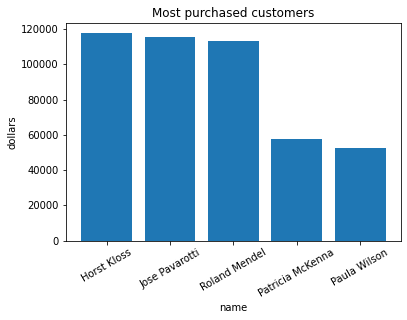

In [56]:
create_bar_chart_from_db(customers)